# `Business Understanding`

Train a machine learning model to predict whether a customer is male or female

# `Data Understanding`

## Importation of all necessary packages

In [1]:
# Import NumPy for numerical operations
import numpy as np

# Import pandas for data manipulation and analysis
import pandas as pd

# Import train_test_split from sklearn.model_selection to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import StandardScaler from sklearn.preprocessing to scale features
from sklearn.preprocessing import StandardScaler

# Import KNeighborsClassifier from sklearn.neighbors for K-Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

# Import accuracy_score, classification_report, confusion_matrix from sklearn.metrics for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import LabelEncoder from sklearn.preprocessing to encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Import matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization
import seaborn as sns

## Read Data

In [2]:
# Read the CSV file 'dollar_tree-231012-195712.csv' into a DataFrame named df_dt
df_dt = pd.read_csv('dollar_tree-231012-195712.csv')

# Display the first few rows of the DataFrame to inspect the data
df_dt.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


## Perform a `brief` EDA  (info(), describe(), corr() etc)

In [3]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [4]:
df_dt.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [5]:
df_dt.corr()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
index,1.000000,0.003961,-0.045523,0.002157,-0.068250,-0.069691,-0.081392,-0.083338,-0.145997
Year,0.003961,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361,-0.025333
Customer Age,-0.045523,0.049873,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836,0.001198
Quantity,0.002157,0.000919,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418,-0.024744
Unit Cost,-0.068250,-0.073245,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957,0.021894
Unit Price,-0.069691,-0.022628,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034,0.019971
Cost,-0.081392,-0.084566,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119,0.024892
Revenue,-0.083338,-0.025361,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000,0.022325
Column1,-0.145997,-0.025333,0.001198,-0.024744,0.021894,0.019971,0.024892,0.022325,1.000000


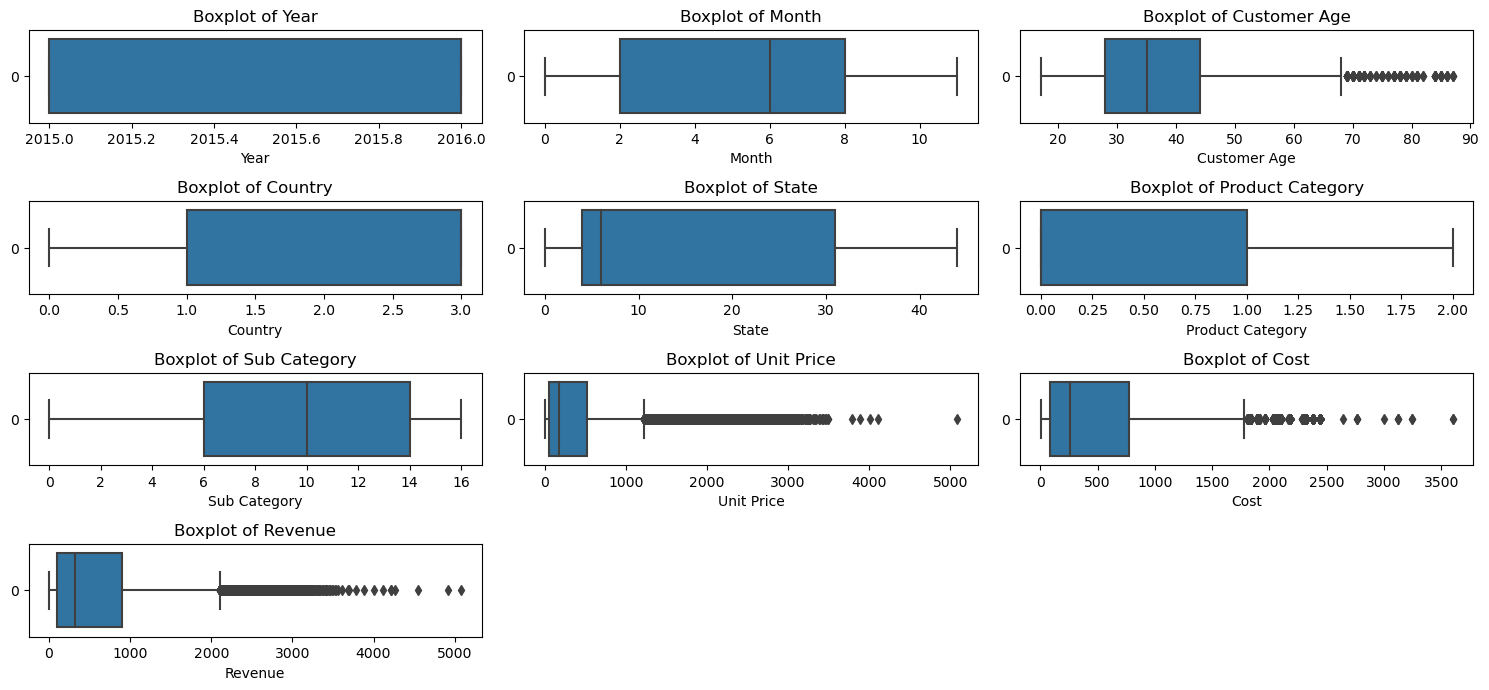

In [61]:
# Create a separate boxplot for each numerical variable
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Calculate the number of rows and columns for subplots
num_numerical_cols = len(df_dt.select_dtypes(include='number').columns)
num_rows = (num_numerical_cols + 2) // 2  
num_cols = min(num_numerical_cols, 3)

# Iterate over each numerical column
for i, column in enumerate(df_dt.select_dtypes(include='number').columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df_dt[column], orient='h')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('')  # Remove y-axis label for better clarity

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


# `Data Preparation`

## Data Cleaning

In [8]:
duplicates= df_dt.duplicated()
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
34862    False
34863    False
34864    False
34865    False
34866    False
Length: 34867, dtype: bool

In [9]:
true_dup= df_dt.duplicated().any()
true_dup

False

In [10]:
missing_data=df_dt.isna()
missing_data

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
34863,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
34864,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
34865,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [11]:
# Calculate the sum of missing values in each column of the DataFrame
missing_data_sum = df_dt.isna().sum()

# Display the sum of missing values for each column
missing_data_sum

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [12]:
# dropping columns that will not be used
df_dt.drop(columns=['Column1', 'index','Date'], inplace=True)
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              34866 non-null  float64
 1   Month             34866 non-null  object 
 2   Customer Age      34866 non-null  float64
 3   Customer Gender   34866 non-null  object 
 4   Country           34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product Category  34866 non-null  object 
 7   Sub Category      34866 non-null  object 
 8   Quantity          34866 non-null  float64
 9   Unit Cost         34866 non-null  float64
 10  Unit Price        34866 non-null  float64
 11  Cost              34866 non-null  float64
 12  Revenue           34867 non-null  float64
dtypes: float64(7), object(6)
memory usage: 3.5+ MB


In [42]:
# dropping columns that will not be used
df_dt.drop(columns=['Quantity', 'Unit Cost'], inplace=True)
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              34866 non-null  float64
 1   Month             34866 non-null  int64  
 2   Customer Age      34866 non-null  float64
 3   Customer Gender   34866 non-null  object 
 4   Country           34866 non-null  int64  
 5   State             34866 non-null  int64  
 6   Product Category  34866 non-null  int64  
 7   Sub Category      34866 non-null  int64  
 8   Unit Price        34866 non-null  float64
 9   Cost              34866 non-null  float64
 10  Revenue           34866 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.2+ MB


In [43]:
# Drop rows with missing values from the DataFrame df_dt
df_dt =df_dt.dropna()
# Display basic information about the DataFrame after dropping missing values
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              34866 non-null  float64
 1   Month             34866 non-null  int64  
 2   Customer Age      34866 non-null  float64
 3   Customer Gender   34866 non-null  object 
 4   Country           34866 non-null  int64  
 5   State             34866 non-null  int64  
 6   Product Category  34866 non-null  int64  
 7   Sub Category      34866 non-null  int64  
 8   Unit Price        34866 non-null  float64
 9   Cost              34866 non-null  float64
 10  Revenue           34866 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.2+ MB


## Divide data into input and output

In [44]:
# Separate features (x) and target variable (y)
x = df_dt.drop(columns=['Customer Gender'])  # Features
y = df_dt['Customer Gender']  # Target

## Encoding

### 1. Encode the target column (the labels)


In [45]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable (y)
y_encoded = label_encoder.fit_transform(y)

# Display the encoded target variable
y_encoded

array([0, 0, 0, ..., 1, 1, 1])

### 2. Encode categorical columns

In [46]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['Month', 'Country', 'State', 'Product Category', 'Sub Category']
for column in categorical_columns:
    df_dt[column] = label_encoder.fit_transform(df_dt[column])
df_dt_new=df_dt.drop(columns=['Customer Gender'])

# Display the DataFrame with encoded categorical columns
df_dt_new


,Year,Month,Customer Age,Country,State,Product Category,Sub Category,Unit Price,Cost,Revenue
0,2016.0,3,29.0,3,42,0,14,109.000000,80.0,109.0
1,2016.0,3,29.0,3,42,2,6,28.500000,49.0,57.0
2,2016.0,3,29.0,3,42,0,14,5.000000,11.0,15.0
3,2016.0,7,29.0,3,42,0,14,116.500000,175.0,233.0
4,2016.0,7,29.0,3,42,0,14,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...
34861,2015.0,7,38.0,0,5,1,10,1487.000000,2049.0,1487.0
34862,2016.0,3,38.0,0,12,1,10,985.500000,2320.0,1971.0
34863,2015.0,7,38.0,0,12,1,10,1583.000000,2049.0,1583.0
34864,2015.0,0,38.0,0,12,1,10,560.666667,2049.0,1682.0


### Replace original categorical columns with encoded ones
##### Don't forget Reset indices to ensure proper alignment when I concatenate


In [47]:
# Assign df_encoded back to df_dt
df_cat=df_dt_new
# Reset indices of DataFrame df_dt
df_cat.reset_index(drop=True, inplace=True)

df_cat

,Year,Month,Customer Age,Country,State,Product Category,Sub Category,Unit Price,Cost,Revenue
0,2016.0,3,29.0,3,42,0,14,109.000000,80.0,109.0
1,2016.0,3,29.0,3,42,2,6,28.500000,49.0,57.0
2,2016.0,3,29.0,3,42,0,14,5.000000,11.0,15.0
3,2016.0,7,29.0,3,42,0,14,116.500000,175.0,233.0
4,2016.0,7,29.0,3,42,0,14,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...
34861,2015.0,7,38.0,0,5,1,10,1487.000000,2049.0,1487.0
34862,2016.0,3,38.0,0,12,1,10,985.500000,2320.0,1971.0
34863,2015.0,7,38.0,0,12,1,10,1583.000000,2049.0,1583.0
34864,2015.0,0,38.0,0,12,1,10,560.666667,2049.0,1682.0


# `Modeling`

In [48]:
y= y_encoded
y


array([0, 0, 0, ..., 1, 1, 1])

In [21]:
x= df_cat
x

,Year,Month,Customer Age,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016.0,3,29.0,3,42,0,14,1.0,80.00,109.000000,80.0,109.0
1,2016.0,3,29.0,3,42,2,6,2.0,24.50,28.500000,49.0,57.0
2,2016.0,3,29.0,3,42,0,14,3.0,3.67,5.000000,11.0,15.0
3,2016.0,7,29.0,3,42,0,14,2.0,87.50,116.500000,175.0,233.0
4,2016.0,7,29.0,3,42,0,14,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34861,2015.0,7,38.0,0,5,1,10,1.0,2049.00,1487.000000,2049.0,1487.0
34862,2016.0,3,38.0,0,12,1,10,2.0,1160.00,985.500000,2320.0,1971.0
34863,2015.0,7,38.0,0,12,1,10,1.0,2049.00,1583.000000,2049.0,1583.0
34864,2015.0,0,38.0,0,12,1,10,3.0,683.00,560.666667,2049.0,1682.0


In [49]:
# Step 1: Choose a Value for K
k = 5

# Step 2: Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# Step 3: Scale Features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 4: Train the Model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

# `Evaluation`

### Plot the confusion Matrix using  `matplotlib` and or `seaborn`

In [50]:
# Step 4: Evaluate the model
y_pred = knn.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy

C:\Users\GREATNESS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.534270146257528

In [51]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create DataFrame from confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the DataFrame
print(cm_df)

          Predicted 0  Predicted 1
Actual 0         1755         1596
Actual 1         1652         1971


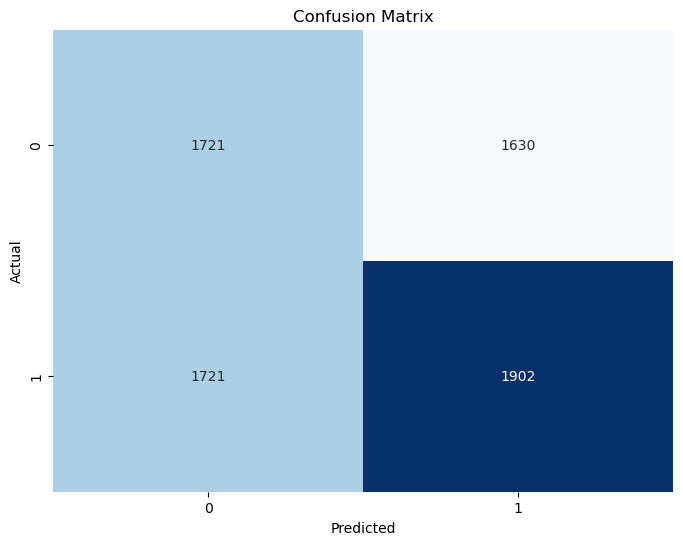

In [28]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Build a classification Report

In [52]:
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame
df_report = pd.DataFrame(report).transpose()

# Print the DataFrame
print(df_report)

              precision    recall  f1-score     support
0              0.515116  0.523724  0.519384  3351.00000
1              0.552565  0.544024  0.548261  3623.00000
accuracy       0.534270  0.534270  0.534270     0.53427
macro avg      0.533841  0.533874  0.533823  6974.00000
weighted avg   0.534571  0.534270  0.534386  6974.00000
